In [1]:
from acquisition_utils import AcquisitionManager, acquisition_cell, save_acquisition, load_acquisition, AcquisitionLoop
AcquisitionManager.data_directory = './data'

## Saving data from a cell

In [2]:
%%acquisition_cell saving_sine

import numpy as np

x = np.linspace(0, 10*np.pi, 101)
y = np.sin(x)

BEWARE: ongoing acquisition was not saved yet!


In [3]:
save_acquisition(x=x, y=y) # doesn't need to be called in the same cell as %%acquisition_cell
# in fact, the kernell could have been restarted in the meantime (as long as x and y are retrieved somehow)

saving to h5 ./data\saving_sine\2022-09-22_14-10-07_saving_sine.h5


## Retrieve data automatically from last acquisition cell

saving fig ./data\saving_sine\2022-09-22_14-10-07_saving_sine_FIG1.pdf


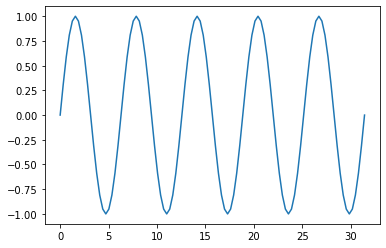

In [4]:
%%analysis_cell
from pylab import *

data = load_acquisition()
fig = plt.figure()
plt.plot(data.x, data.y)

data.save_fig(fig)

## Retrieve data from old acquisition

saving fig ./old_data_example_FIG1.pdf


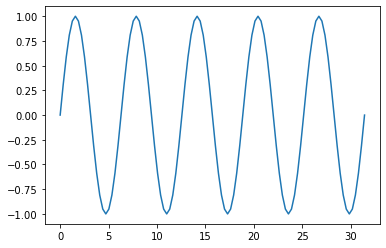

In [5]:
%%analysis_cell ./old_data_example.h5

data = load_acquisition()

fig = plt.figure()
plt.plot(data.x, data.y)

data.save_fig(fig)

## Perform loop transparently

### Single-stage loop

In [6]:
%%acquisition_cell loop_simple
POINTS = 101
freqs = np.linspace(0, 0.4, 10)

def acquire_sine(freq, points):
    x = np.linspace(0, 10*np.pi, points)
    y = np.sin(freq*2*np.pi*x)
    return x, y

loop = AcquisitionLoop()
for freq in loop(freqs):    
    x, y = acquire_sine(freq, POINTS)
    loop.append_data(y=y, freq=freq)
loop.append_data(x=x)

save_acquisition(loop_freq=loop)

saving to h5 ./data\loop_simple\2022-09-22_14-10-12_loop_simple.h5


saving fig ./data\loop_simple\2022-09-22_14-10-12_loop_simple_FIG_superimposed.pdf
saving fig ./data\loop_simple\2022-09-22_14-10-12_loop_simple_FIG_color_plot.pdf


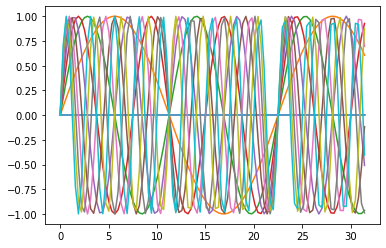

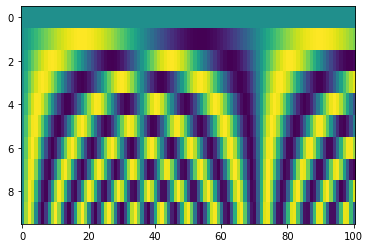

In [7]:
%%analysis_cell

data = load_acquisition()

fig = plt.figure()
for dat in data.loop_freq: # access data in a sequential way (individual AnalysiData objects)
    plt.plot(dat.x, dat.y)
data.save_fig(fig, 'superimposed')

fig = plt.figure()
# access all loop data as a multi-dimensional array:
plt.imshow(data.loop_freq.data['y'], aspect='auto')

data.save_fig(fig, 'color_plot')

### Multi-stage loops

In [8]:
%%acquisition_cell loop_double
POINTS = 101
freqs = np.linspace(0, 0.4, 10)
taus = np.linspace(0, 0.3, 5)

def acquire_sine(freq, points, tau):
    x = np.linspace(0, 10*np.pi, points)
    y = np.sin(freq*2*np.pi*x)
    y*=np.exp(-x*tau)
    return x, y

loop = AcquisitionLoop()
for tau in loop(taus):
    loop.append_data(tau=tau)
    for freq in loop(freqs):    
        x, y = acquire_sine(freq, POINTS, tau)
        loop.append_data(y=y, freq=freq)
    loop.append_data(x=x)

save_acquisition(loop_tau_freq=loop)

saving to h5 ./data\loop_double\2022-09-22_14-10-14_loop_double.h5


saving fig ./data\loop_double\2022-09-22_14-10-14_loop_double_FIG_tau=0.0.pdf
saving fig ./data\loop_double\2022-09-22_14-10-14_loop_double_FIG_tau=0.075.pdf
saving fig ./data\loop_double\2022-09-22_14-10-14_loop_double_FIG_tau=0.15.pdf
saving fig ./data\loop_double\2022-09-22_14-10-14_loop_double_FIG_tau=0.22499999999999998.pdf
saving fig ./data\loop_double\2022-09-22_14-10-14_loop_double_FIG_tau=0.3.pdf
saving fig ./data\loop_double\2022-09-22_14-10-14_loop_double_FIG_1d.pdf


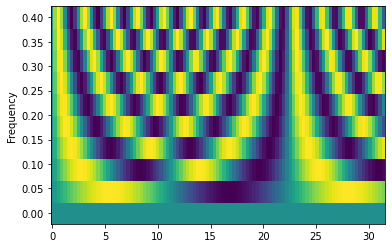

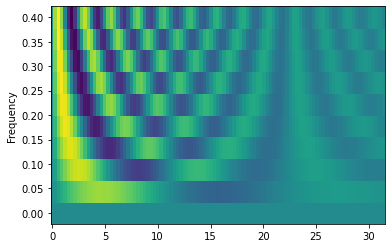

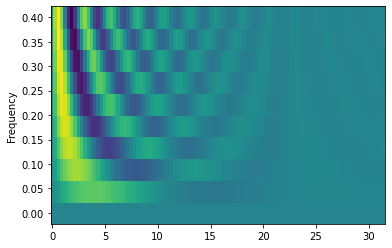

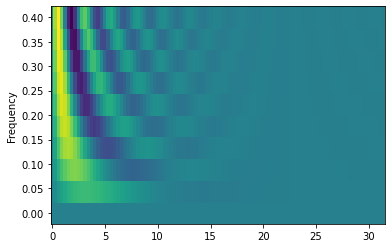

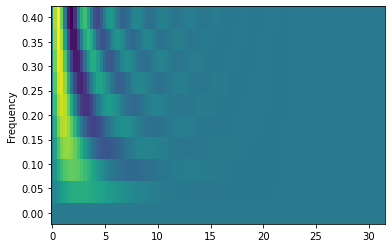

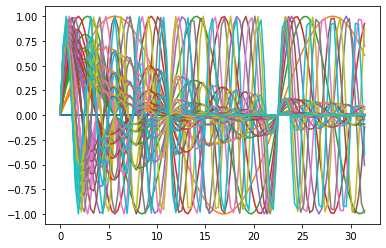

In [9]:
%%analysis_cell

data = load_acquisition()
fig2d = [None]*data.loop_tau_freq.loop_shape[0]
fig1d = plt.figure('1d')


for index, freq_series in enumerate(data.loop_tau_freq):
    fig2d[index] = plt.figure(f"2D-graph_{freq_series.data['tau']}")
    plt.pcolor(freq_series.data['x'], freq_series.data['freq'], freq_series.data['y'])
    data.save_fig(fig2d[index], name=f"tau={freq_series.data['tau'][0]}")
    plt.ylabel('Frequency')
    for dat in freq_series:
        plt.figure('1d')
        plt.plot(dat.x, dat.y)
data.save_fig(fig1d, name='1d')